# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

**Al abrir los archivos en un editor de texto, se nota que los valores se separan por ';', por lo que es necesario agregar el parámetro sep=. 
Para que pandas identifique el encabezado como la primera línea con ayuda del parámetro header=. 
Por medio de info() mostraremos la informacion de cada DataFrame** 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
# importar librerías

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';',header='infer')
products = pd.read_csv('/datasets/products.csv', sep=';',header='infer')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';',header='infer')
departments = pd.read_csv('/datasets/departments.csv', sep= ';', header='infer')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';', header='infer')# leer conjuntos de datos en los DataFrames

In [3]:
orders.info()
print()
print(orders.duplicated().sum())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

15


In [4]:
products.info()
print()
print(products.duplicated().sum())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

0


In [5]:
aisles.info()
print()
print(aisles.duplicated().sum())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

0


In [6]:
departments.info()
print()
print(departments.duplicated().sum())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

0


In [7]:
order_products.info(show_counts=True)
print()
print(order_products.duplicated().sum())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

0


## Conclusiones


**En el caso del DataFrame instacart_orders, solo tenemos valores ausentes en la columna de days_since_prior_order.**

**Para el caso del DataFrame products, solo tenemos valores ausentes en la columna de product_name.**

**En el caso de aisles y departments no tenemos valores ausentes.**

**Y en el caso de order_products, solo la columna de add_to_cart_order tiene valores ausentes.**

**Realizamos un primer vistazo para saber si tenemos filas completamente duplicadas.**


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución



### Duplicados
- **Para cualquiera de los DataFrames, primero usaremos el método duplicated().sum() para identificar filas completas duplicadas.**
- **Segun sea el caso, será necesario verificar con el mismo método pero en una columna particular y significativa como las de valores ID que identifican de manera única a los valores, con la ayuda de subset=.**
- **Dependiendo si es necesario, llamaremos a value_counts() para evaluar si hay valores mal escritos y que signifiquen algun valor duplicado**

### Valores ausentes 


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
print(orders.duplicated().sum())# Revisa si hay pedidos duplicados


15


In [9]:
print(orders.duplicated(subset=['order_id']).sum())

15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

**Verificamos solo en la columna order_id ya que es la única que representa un error si hay dusplicados, ya que se pueden repetir los valores en las otras filas, y eso no significa que sea un duplicado a eliminar**

In [10]:
# Basándote en tus hallazgos,
wednesday_orders_two_am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(wednesday_orders_two_am)# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

In [11]:
orders = orders.drop_duplicates().reset_index(drop=True)
# Elimina los pedidos duplicados

In [12]:
print(orders.duplicated().sum())# Vuelve a verificar si hay filas duplicadas


0


In [13]:
print(orders.duplicated(subset=['order_id']).sum())# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


0


Describe brevemente tus hallazgos y lo que hiciste con ellos

**Se eliminaron las 15 filas duplicadas por completo, y volvimos a verificar si había duplicados en la columna de order_id, y ya se eliminaron por completo.** 

### `products` data frame

In [14]:
print(products.duplicated().sum())# Verifica si hay filas totalmente duplicadas

0


In [15]:
print(products['department_id'].value_counts(dropna=False).sort_index())
print()
print(products.duplicated(subset=['department_id']).sum())# Revisa únicamente si hay ID de departamentos duplicados

1     4008
2      548
3     1516
4     1684
5     1054
6     1139
7     4366
8      972
9     1858
10      38
11    6564
12     907
13    5372
14    1117
15    2092
16    3449
17    3085
18    1081
19    6264
20    1322
21    1258
Name: department_id, dtype: int64

49673


In [16]:
products['product_name'] = products['product_name'].str.upper()
print(products.duplicated(subset=['product_name']).sum())
print()
print(products['product_name'].value_counts(dropna=False).sort_index())# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

1361

#2 COFFEE FILTERS                                                                             1
#2 CONE WHITE COFFEE FILTERS                                                                  1
#2 MECHANICAL PENCILS                                                                         1
#4 NATURAL BROWN COFFEE FILTERS                                                               1
& GO! HAZELNUT SPREAD + PRETZEL STICKS                                                        1
                                                                                           ... 
\"IM PEI-NUT BUTTER\" DOUBLE CHOCOLATE COOKIE & PEANUT BUTTER ICE CREAM                       1
\"LOUIS BA-KAHN\" CHOCOLATE CHIP COOKIE & BROWN BUTTER CANDIED BACON ICE CREAM SANDWICH       1
\"MIES VANILLA ROHE\" ICE CREAM BARS                                                          1
\"MOKACCINO\" MILK + BLUE BOTTLE COFFEE CHOCOLATE                                             1
NaN                               

In [17]:
print(products.duplicated(subset=['product_id']).sum())# Revisa si hay nombres duplicados de productos no faltantes

0


In [18]:
not_missing_products = products[~(products['product_name'].isna())] 
not_missing_products2 = not_missing_products[not_missing_products['product_name'] != 'Unknown']
print(not_missing_products2.duplicated(subset=['product_name']).sum())

104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- **Teniendo en cuenta que no hay filas que estén duplicadas por completo, y que en la columna de product_id no hay duplicados, podemos asumir que no hay duplicados en este DataFrame, ya que el product_id es el que identifica de manera única cada producto.**
- **En el caso de department_id puede haber duplicados ya que varios productos pueden formar parte de un mismo departamento, y no significa que esté duplicado**


### `departments` data frame

In [19]:
print(departments.duplicated().sum())# Revisa si hay filas totalmente duplicadas

0


In [20]:
print(departments.duplicated(subset=['department_id']).sum())# Revisa únicamente si hay IDs duplicadas de productos

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- **Teniendo en cuenta que no tenemos filas completas duplicadas, y que el department_id tampoco tiene duplicados, podemos asumir que en este DataFrame no hay duplicados, ya que este número es el que identifica de manera única a cada departamento**


### `aisles` data frame

In [21]:
print(aisles.duplicated().sum())# Revisa si hay filas totalmente duplicadas

0


In [22]:
print(aisles.duplicated(subset=['aisle_id']).sum())# Revisa únicamente si hay IDs duplicadas de productos

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- **Teniendo en cuenta que no tenemos filas completas duplicadas, y que el aisle_id tampoco tiene duplicados, podemos asumir que en este DataFrame no hay duplicados, ya que este número es el que identifica de manera única a cada categoría de pasillo**


### `order_products` data frame

In [23]:
print(order_products.duplicated().sum())# Revisa si hay filas totalmente duplicadas

0


In [24]:
print(order_products.duplicated(subset=['order_id']).sum())# Vuelve a verificar si hay cualquier otro duplicado engañoso

4094961


In [25]:
print(order_products.sort_values(by='order_id').head(20))

         order_id  product_id  add_to_cart_order  reordered
2043091         4       34862                8.0          1
1420535         4       10054                5.0          1
1299531         4       32645               12.0          1
311805          4       46842                1.0          0
4107072         4       40285                9.0          1
3189411         4       25146               11.0          1
2834230         4       26434                2.0          1
3977678         4       21351                6.0          1
1295279         4       39758                3.0          1
2507695         4       17616               10.0          1
1169276         4       27761                4.0          1
2502556         4       41276               13.0          1
1172585         4       22598                7.0          1
3310901         9       31506                8.0          1
2585632         9       34203                6.0          1
1094420         9        2014           

Describe brevemente tus hallazgos y lo que hiciste con ellos.

- **Al utilizar el método duplicated() a la columna de order_id, nos da un resultado que hace suponer que el 90% de los valores son duplicados, lo cual no tiene sentido.**
- **Al llamar a sort_values, nos damos cuenta que el order_id se repite por cada producto que se ha ordenado.**
- **Teniendo en cuenta que múltiples clientes pueden ordenar un mismo producto, no tiene sentido verificar si hay duplicados en la columna de product_id.**
- **Y al verificar que no hay filas completamente duplicadas, podemos asumir que no hay duplicados en este DataFrame**

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [26]:
print(products[products['product_name'].isna()]) # Encuentra los valores ausentes en la columna 'product_name'

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

**Con la muestra que tenemos, podemos ver que los valores ausentes están en el pasillo 100 y pertenecen al departamento 21**

In [27]:
print(products[(products['product_name'].isna()) & (products['aisle_id'] != 100)])

#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

**Usando múltiples condiciones de filtrado, con la ayuda de isna() e identificando especificamente cualquier pasillo que sea desigual a 100, podemos deducir que todos los ausentes son del pasillo 100**

In [28]:
print(products[(products['product_name'].isna()) & (products['department_id'] != 21)])
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

**Usando múltiples condiciones de filtrado, con la ayuda de isna() e identificando especificamente cualquier departamento que sea desigual a 21, podemos deducir que todos los ausentes son del departamento 21**

In [29]:
print(products[(products['aisle_id'] == 100) & (products['department_id'] == 21) & (~products['product_name'].isna())])
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

**Verificando con el filtro de los valores del pasillo 100, del departamento 21 y buscando obtener si hay valores que NO sean ausentes, vemos que no los hay. Por lo que podemos deducir que todos los valores del departamento 21 en el pasillo 100 son valores ausentes** 

In [30]:
products['product_name'] = products['product_name'].fillna('Unknown')
print(products[(products['aisle_id'] == 100) & (products['department_id'] == 21)])
# Completa los nombres de productos ausentes con 'Unknown'


       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Con la ayuda del método fillna() sustituimos NaN por Unknown, y despues verificamos con los mismos filtros de pasillo 100 y departamento 21 para verificar el cambio.**

### `orders` data frame

In [31]:
print(orders[orders['days_since_prior_order'].isna()]) # Encuentra los valores ausentes

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [32]:
print(orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)])# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [33]:
print(orders[orders['order_number'] == 1])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [34]:
print(orders['days_since_prior_order'].value_counts(dropna=False).sort_index())
#verificamos si algun valor tiene decimales

0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
NaN     28817
Name: days_since_prior_order, dtype: int64


In [35]:
# cambiamos el valor de días en lugar de flotantes a enteros
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0).astype('int')
#verificamos el resultado
print(orders['days_since_prior_order'].value_counts(dropna=False).sort_index())

0     38406
1     20179
2     27138
3     30224
4     31006
5     30096
6     33930
7     44577
8     25361
9     16753
10    13309
11    11467
12    10658
13    11737
14    13992
15     9416
16     6587
17     5498
18     4971
19     4939
20     5302
21     6448
22     4514
23     3337
24     3015
25     2711
26     2640
27     2986
28     3745
29     2673
30    51337
Name: days_since_prior_order, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- **Después de verificar si hay valores ausentes que no fueran el primer pedido del cliente, podemos deducir que todos los valores ausentes son porque eran el primer pedido del cliente y por eso no habían transcurrido días desde la última compra**
- **Al generar un segundo filtro, para verificar cuál era el valor para cuando era la primera vez que hacían un pedido, vemos que no hay valores, por lo que lo ideal sería sustituir por 0 en los días transcurridos desde la primera orden**
- **Finalmente verificamos si es seguro cambiar el tipo de valor a entero sin afectar los valores, con la ayuda de value_counts comprobamos que no tienen decimales.**
- **El valor total de 0 ahora aumenta sumandose todos los valores ausentes**


### `order_products` data frame

In [36]:
print(order_products[order_products['add_to_cart_order'].isna()])# Encuentra los valores ausentes

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [37]:
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())# ¿Cuáles son los valores mínimos y máximos en esta columna?


1.0
64.0


Describe brevemente cuáles son tus hallazgos.

**Comparado con los DataFrames anteriores, no podemos tener una idea clara que estos valores solo se presenten en alguna situación, ya que a pesar que vemos que en la columna reordered se repite el hecho que el cliente nunca ha pedido este producto antes, si hay valores que significan que sí lo ha pedido antes.**


In [38]:
missing_cart_id = order_products[order_products['add_to_cart_order'].isna()]['order_id']
print(missing_cart_id)
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [39]:
more_products = order_products[(order_products['add_to_cart_order'] > 64) & (order_products['add_to_cart_order'] != 999) ]
print(more_products)
print()
print(missing_cart_id.value_counts(dropna=False))
print()
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
missing_orders = order_products.groupby('order_id')['product_id'].count()
print(missing_orders.min())
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
2652650     1
2729254     1
2621907     1
888470      1
1677118     1
Name: order_id, Length: 70, dtype: int64

1


Describe brevemente cuáles son tus hallazgos.

- **Son 70 las ID de pedidos que tienen valores ausentes, las cuales tiene menos de 64 productos.**
- **El valor mínimo de pedidos es 1**

In [40]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')
print(order_products['add_to_cart_order'].value_counts(dropna=False).sort_index())
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


1      450046
2      428199
3      401907
4      372861
5      341807
        ...  
61        114
62         98
63         87
64         75
999       836
Name: add_to_cart_order, Length: 65, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- **Para simplificar la verificación que los valores flotantes de add_to_cart_order no tuvieran decimales, imprimimos la lista, para poder ver todos los valores, usamos head() y tail().**
- **Ahora hemos sustituido los valores ausentes por 999 y convertido en un valor entero para poder identificarlos manualmente**

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

- **Pudimos notar en el caso de 2 DataFrames que los valores ausentes tenían una razón particular, la cual nos fue de ayuda para poder sustituirlos.**
- **Es de gran ayuda para identificar duplicados contar con al menos 1 columna de valores únicos que identifican un objeto específico.**
- **Con ayuda de diferentes métodos como sort_values(), value_counts(), groupby(), entre otros, podemos filtrar, categorizar e identificar estos patrones.**



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
print(orders['order_hour_of_day'].value_counts().sort_index())

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


In [42]:
print(orders['order_dow'].unique())

[6 5 0 4 3 1 2]


Escribe aquí tus conclusiones

**Tanto los valores de hora del día y del día de la semana corresponden con el valor esperado**

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: user_id, dtype: int64


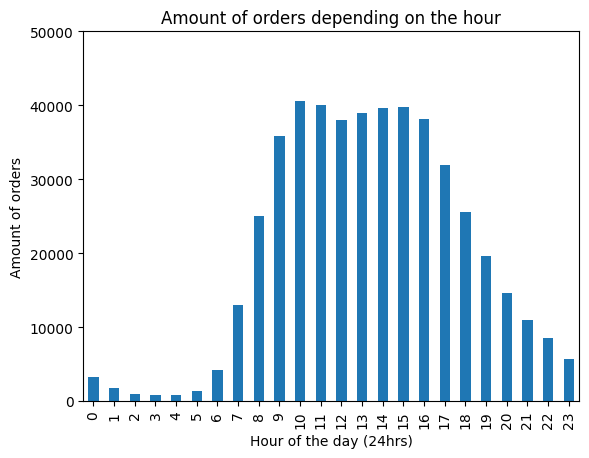

In [43]:
graph_orders_hour = orders.groupby('order_hour_of_day')['user_id'].count()
print(graph_orders_hour)

graph_orders_hour.plot(x= 'order_hour_of_day',
            y= 'user_id',
            title = 'Amount of orders depending on the hour',
            xlabel= 'Hour of the day (24hrs)',
            ylabel= 'Amount of orders',
            kind= 'bar',
            ylim = [0,50000],
            xlim= [-1,24]
           )
plt.show()

###### Escribe aquí tus conclusiones

- **La hora en la que más se hacen pedidos es a las 10am**
- **En el rango de las 9am a las 4pm los pedidos son mayores de 35,000**
- **La hora con menos pedidos es a las 4am**

### [A3] ¿Qué día de la semana compran víveres las personas?

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: user_id, dtype: int64


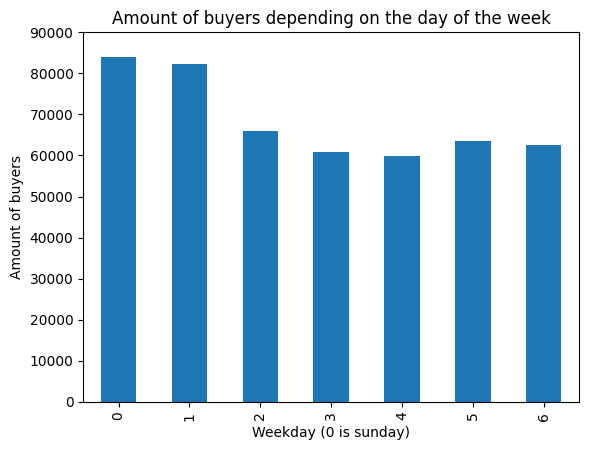

In [44]:
weekday_orders = orders.groupby('order_dow')['user_id'].count()
print(weekday_orders)

weekday_orders.plot(x= 'order_dow',
            y= 'order_id',
            title = 'Amount of buyers depending on the day of the week',
            xlabel= 'Weekday (0 is sunday)',
            ylabel= 'Amount of buyers',
            kind= 'bar',
            ylim = [0,90000],
            xlim= [-1,7]
           )
plt.show()

Escribe aquí tus conclusiones

- **El día en el que se hacen más pedidos es en domingo.**
- **El día en el que se hacen menos pedidos es el jueves.**

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

days_since_prior_order
0     38406
1     20179
2     27138
3     30224
4     31006
5     30096
6     33930
7     44577
8     25361
9     16753
10    13309
11    11467
12    10658
13    11737
14    13992
15     9416
16     6587
17     5498
18     4971
19     4939
20     5302
21     6448
22     4514
23     3337
24     3015
25     2711
26     2640
27     2986
28     3745
29     2673
30    51337
Name: user_id, dtype: int64

El tiempo mínimo es: 2640
El tiempo máximo es: 51337


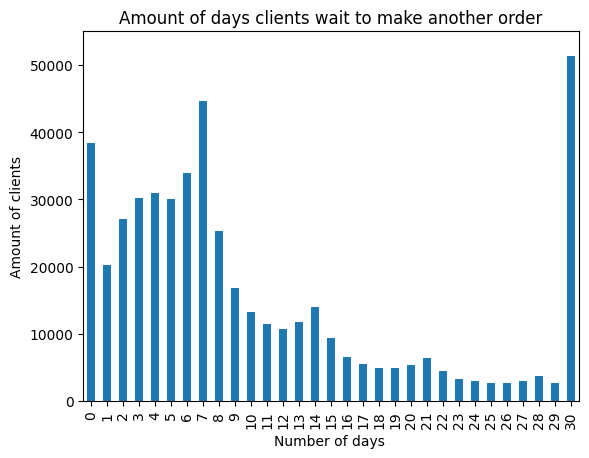

In [45]:
wait_time_bet_orders = orders.groupby('days_since_prior_order')['user_id'].count()
print(wait_time_bet_orders)
print()
print("El tiempo mínimo es:", wait_time_bet_orders.min())
print("El tiempo máximo es:", wait_time_bet_orders.max())

wait_time_bet_orders.plot(x= 'days_since_prior_order',
            y= 'user_id',
            title = 'Amount of days clients wait to make another order',
            xlabel= 'Number of days ',
            ylabel= 'Amount of clients',
            kind= 'bar',
            ylim = [0,55000],
            xlim= [-1,31]
           )
plt.show()

Escribe aquí tus conclusiones

- **El número máximo de días que esperan los clientes es de 30 días**
- **El número mínimo que muestra que menos clientes han esperado es de 26 días**
- **En este caso, el hecho que 0 tenga un valor alto hace suponer que el cliente no esperó para realizar una siguiente compra, sin embargo como habíamos analizado previamente, muchos de los clientes que era la primera vez que habían comprado aparecerían bajo el 0, por lo que a menos que generemos un filtro en cuanto a la primera vez de compra, no podemos asumir** 
- **La mayoría de los clientes espera 30 días para realizar su siguiente pedido, podemos deducir que realizan sus compras mensuales, en lugar de semanales o quincenales.**

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

    wednesday_orders  saturday_orders
0                373              464
1                215              254
2                106              177
3                101              125
4                108              118
5                170              161
6                643              451
7               1732             1619
8               3125             3246
9               4490             4311
10              5026             4919
11              5004             5116
12              4688             5132
13              4674             5323
14              4774             5375
15              5163             5188
16              4976             5029
17              4175             4295
18              3463             3338
19              2652             2610
20              1917             1847
21              1450             1473
22              1154             1185
23               718              893
60897 62649


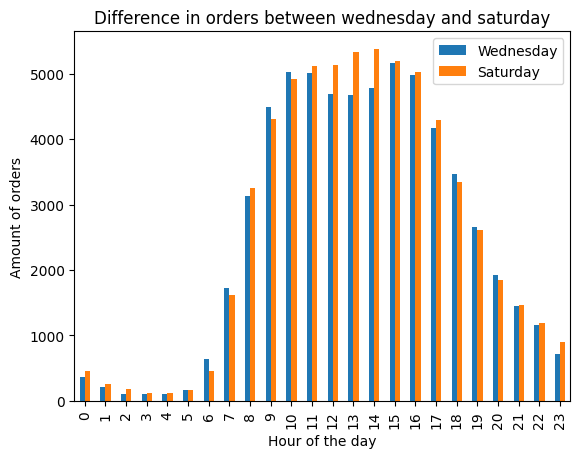

In [46]:
wednesday_orders = orders[orders['order_dow'] == 3]['order_hour_of_day']
wednesday_orders = wednesday_orders.value_counts().sort_index()

saturday_orders = orders[orders['order_dow'] == 6]['order_hour_of_day']
saturday_orders = saturday_orders.value_counts().sort_index()

wed_and_sat_orders = pd.concat([wednesday_orders, saturday_orders], axis='columns')
wed_and_sat_orders.columns = ['wednesday_orders','saturday_orders']
print(wed_and_sat_orders)
print(wed_and_sat_orders['wednesday_orders'].sum(), wed_and_sat_orders['saturday_orders'].sum())

wed_and_sat_orders.plot(
                       y= ['wednesday_orders', 'saturday_orders'],
                       title= 'Difference in orders between wednesday and saturday',
                       xlabel= 'Hour of the day',
                       ylabel= 'Amount of orders',
                       kind='bar',
                       )
plt.legend(['Wednesday', 'Saturday'])
plt.show()


Escribe aquí tus conclusiones

- **El valor más alto de ordenes fue en día Sábado a las 14hrs**
- **La hora con más ordenes del día miércoles fue a las 15hrs**
- **El sábado tiene más ordenes que el miércoles**
- **Las horas con mayor monto de compra son de las 9am a las 17hrs en ambos días**
- **Las horas con menor monto de compra son de las 12am a las 5am en ambos días**


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64


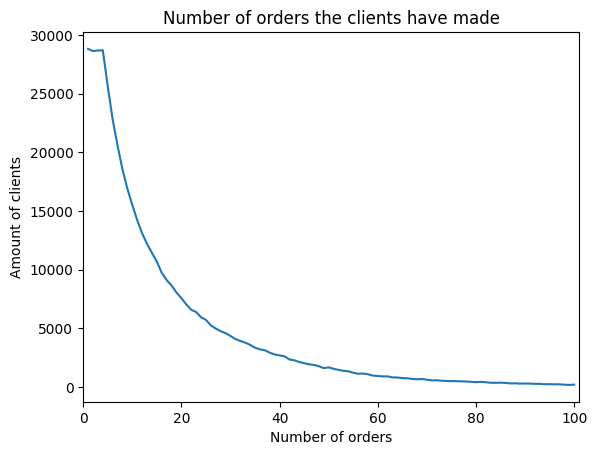

In [47]:
distribution_orders = orders.groupby('order_number')['user_id'].count()
print(distribution_orders)

distribution_orders.plot( x= 'order_number',
                       title= 'Number of orders the clients have made',
                       xlabel= 'Number of orders',
                       ylabel= 'Amount of clients',
                       kind='line',
                       xlim=[0,101])
plt.show()



Escribe aquí tus conclusiones

- **El número mayor de clientes han hecho compras por primera vez**
- **El rango de clientes que han hecho una segunda, tercera compra aumenta a los que han hecho una cuarta compra**
- **EL número mínimo de clientes que han vuelto a hacer compras es de 99 compras, ya que incluso de 100 veces es mayor que de 99 veces.**

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [48]:
products_merged = order_products.merge(products, on='product_id') 
#unimos los DataFrames de products ya que ahí tenemos el nombre de los productos con order_products

sorted_products = products_merged.groupby(['product_id','product_name'])['order_id'].count()
#filtramos las dos columnas que nos interesan y contamos los valores de las ordenes

popular_products = sorted_products.sort_values(ascending=False)
#identificamos los 20 productos más populares

print(popular_products.head(20))


product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


Escribe aquí tus conclusiones

- **Los plátanos son los productos más ordenados**
- **Podemos confirmar que los 20 productos más populares son frutas y vegetales**
- **El 65% de los productos más populares son orgánicos**

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
articles_merged = order_products.merge(orders, on= 'order_id')
#unimos los DataFrames para obtener la columna de user_id

articles_buyer = articles_merged.groupby(['user_id'])['add_to_cart_order'].mean()
#organizamos por medio de usuario y sacamos el promedio de cada usuario para saber cuántos productos lleva en cada carrito  

articles_buyer_mean = articles_buyer.mean()
#sacamos el promedio de todos los clientes 
print('Las personas compran normalmente {} artículos en un pedido'.format(articles_buyer_mean))

Las personas compran normalmente 6.011580110711614 artículos en un pedido


In [50]:
example = articles_merged[articles_merged['user_id'] == 206203]['add_to_cart_order'].mean()
print(example)
print()
print(articles_buyer.tail())#hacer una prueba que el código si está generando el promedio por persona 


14.0

user_id
206203    14.000000
206206     2.285714
206207     5.695652
206208     8.464000
206209     7.240000
Name: add_to_cart_order, dtype: float64


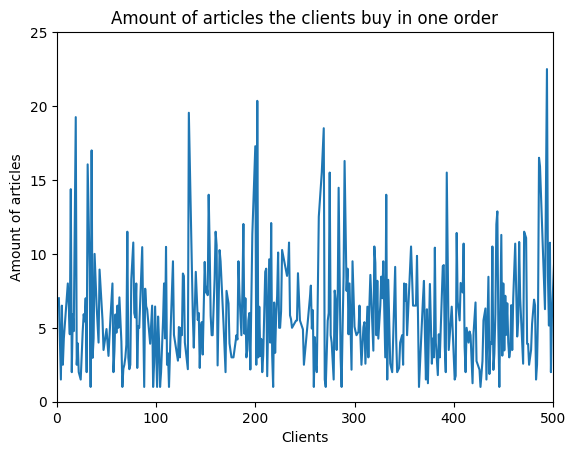

In [51]:
articles_buyer.plot(title= 'Amount of articles the clients buy in one order',
                       xlabel= 'Clients',
                       ylabel= 'Amount of articles',
                       kind='line',
                       xlim=[0,500],
                       ylim=[0,25])
plt.show()



Escribe aquí tus conclusiones

- **Podemos ver que el promedio de clientes ordenan 6 artículos en cada pedido.**
- **Al graficar vemos que el rango va principalmente entre 3 hasta 10 artículos**

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
#products_merged = union de products y order_products
frequent_products = products_merged.query("reordered == 1")[['product_id','product_name']]
most_frequent_products = frequent_products.value_counts()
print(most_frequent_products.head(20))


product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
dtype: int64


Escribe aquí tus conclusiones

- **Vemos nuevamente al plátano como el artículo que se reordena más veces**
- **A pesar que el 95% de la lista se repite con respecto a los artículos más populares, el producto *ORGANIC HALF & HALF* no estaba en la lista de los 20 más populares, sin embargo si es uno de los que más se reordena.**
- **La cantidad entre los plátanos y la bolsa de plátanos orgánicos comparado con los demás productos, practicamente es la cantidad de los productos en las posiciones 10 a 20**

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [53]:
#products_merged = union de products y order_products
pivot_products = products_merged.pivot_table(index='product_name',
                            columns='reordered',
                            values='order_id',
                            aggfunc='count'
                           )
print('0 Si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.')
print()
print(pivot_products.sample(20))

0 Si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

reordered                                              0      1
product_name                                                   
VEGGIE WASH                                         25.0   15.0
LITTLESNUG SZ                                        1.0    NaN
HEMP SEED OIL                                        2.0    NaN
SUGAR FREE  CLASSIC CARAMEL FLAVORING SYRUP          2.0    2.0
T BONE STEAK                                         1.0    NaN
NATURAL PEANUT BUTTER CRUNCHY AND FLAXSEED          44.0   49.0
CHOCOLATE CHEERIOS CEREAL                           46.0   36.0
BODY AND BATH OIL - LEMON & VITAMIN E                3.0    NaN
RAVIOLI- FIVE CHEESE- VALUE PACK                     8.0    NaN
MISO RAMEN                                           1.0    NaN
ORGANIC CAESAR SALAD                                 3.0    1.0
GARLIC MINI LOAF                                     4.0    5.0
FIG & CARDAMON CANDLE          

Escribe aquí tus conclusiones

- **Vemos en la tabla dinámica algunos valores ausentes, ya sea en el caso de haber comprado antes o no**
- **Los artículos que aparecen con datos ausentes en si lo volvieron a comprar, podemos suponer que no fueron de su agrado, pues su número de ordenes no exceden las 10 ordenes.**

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
# articles_merged = union de orders y order_products
clients_orders = articles_merged[['reordered','user_id','product_id']]

client_orders2 = clients_orders.groupby('user_id')['product_id'].count()
client_repeated = clients_orders.query("reordered == 1").groupby('user_id')['product_id'].count()

clients_proportion = client_repeated / client_orders2
print(clients_proportion)
print()
print('El promedio de la tasa de repetición es',clients_proportion.mean())

user_id
2         0.038462
4              NaN
5         0.666667
6              NaN
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: product_id, Length: 149626, dtype: float64

El promedio de la tasa de repetición es 0.556751215911923


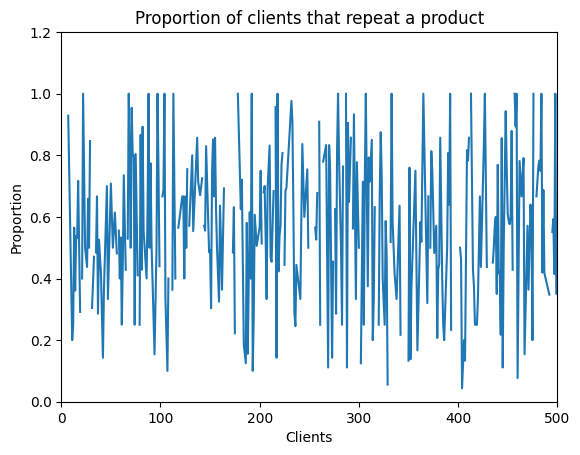

In [55]:
clients_proportion.plot(title= 'Proportion of clients that repeat a product',
                       xlabel= 'Clients',
                       ylabel= 'Proportion',
                       kind='line',
                       xlim=[0,500],
                       ylim=[0,1.2])
plt.show()


Escribe aquí tus conclusiones

- **El promedio de la tasa de repetición es 0.55, lo que significa que del total de los pedidos que hace un cliente, la mitad ya la ha ordenado antes**

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [56]:
#products_merged = union de products y order_products
first_article = products_merged.query("add_to_cart_order == 1").groupby('product_name')['order_id'].count()
print(first_article.sort_values(ascending=False).head(20))

product_name
BANANA                         15562
BAG OF ORGANIC BANANAS         11026
ORGANIC WHOLE MILK              4363
ORGANIC STRAWBERRIES            3946
ORGANIC HASS AVOCADO            3390
ORGANIC BABY SPINACH            3336
ORGANIC AVOCADO                 3044
SPRING WATER                    2336
STRAWBERRIES                    2308
ORGANIC RASPBERRIES             2024
SPARKLING WATER GRAPEFRUIT      1914
ORGANIC HALF & HALF             1797
LARGE LEMON                     1737
SODA                            1733
ORGANIC REDUCED FAT MILK        1397
LIMES                           1370
HASS AVOCADOS                   1340
ORGANIC REDUCED FAT 2% MILK     1310
HALF & HALF                     1309
ORGANIC YELLOW ONION            1246
Name: order_id, dtype: int64


Escribe aquí tus conclusiones

- **Nuevamente vemos en primer lugar a plátano como el producto que los clientes ponen en primer lugar en su carrito**
- **Sin embargo, comparando con los 20 productos más populares y con los que se vuelven a pedir, tenemos ahora entre los primeros 20 a las bebidas, las cuales representan el 40%, un cambio bastante notable**

### Conclusion general del proyecto:

- **La hora del día y el día influye en el monto de compras, lo cual puede ser determinante al momento de generar publicidad y/o descuentos**
- **Teniendo en cuenta que los clientes vuelven a comprar hasta 4 veces, talvez se puede implementar una promoción para una quinta compra**
- **Los plátanos y las bolsas de plátanos orgánicos son los productos más populares, que se repiten con mayor frecuencia y que los clientes colocan en primer lugar en su carrito, habría que evaluar el por qué, para poder replicar en otros artículos**
- **Sabemos que la mayoría de los clientes realizan sus compras mensuales, por lo que podemos especular varias cosas, los clientes mayormente compran víveres duraderos, y/o la fecha de vencimiento de algunos perecederos es más duradera que en otros comercios.**
- **Los clientes prefieren productos organicos**

